<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-4/blob/main/deoldify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lo primero que vamos a hacer es clonar el repositorio de DeOldify

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2253, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 2253 (delta 9), reused 16 (delta 4), pack-reused 2228
Receiving objects: 100% (2253/2253), 69.42 MiB | 30.44 MiB/s, done.
Resolving deltas: 100% (1016/1016), done.


A continuación lo instalamos

In [2]:
cd DeOldify

/content/DeOldify


Instalamos paquetes requeridos de collab a partir del siguiente enlace

In [3]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 215kB 7.5MB/s 
     |████████████████████████████████| 133kB 51.7MB/s 
     |████████████████████████████████| 1.9MB 47.9MB/s 
     |████████████████████████████████| 81kB 13.5MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp37-none-any.whl size=6083 sha256=3246536af87a8026dd0d08fc76056041465a67b1ee94f53b4e38578699a19712
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
  Created wheel for typing: filename=typing-3.7.4.3-cp37-none-any.whl size=26308 sha256=65cadae9e7f49282075e18e8b167012884052347fe7193e6e20d5aa9cc7e7a22
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built ffmpeg typing
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


importamos fastai y deoldify

In [4]:
import fastai
from deoldify.visualize import *

Creamos el directorio models y descargamos el modelo.

In [5]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2021-05-31 21:15:54--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  19.8MB/s    in 13s     

2021-05-31 21:16:08 (18.6 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



Creamos una variable colorizer para luego usar.

In [6]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential s

Introducimos el enlace de la imgaen que queremos usar y a renderización que preferimos usar.

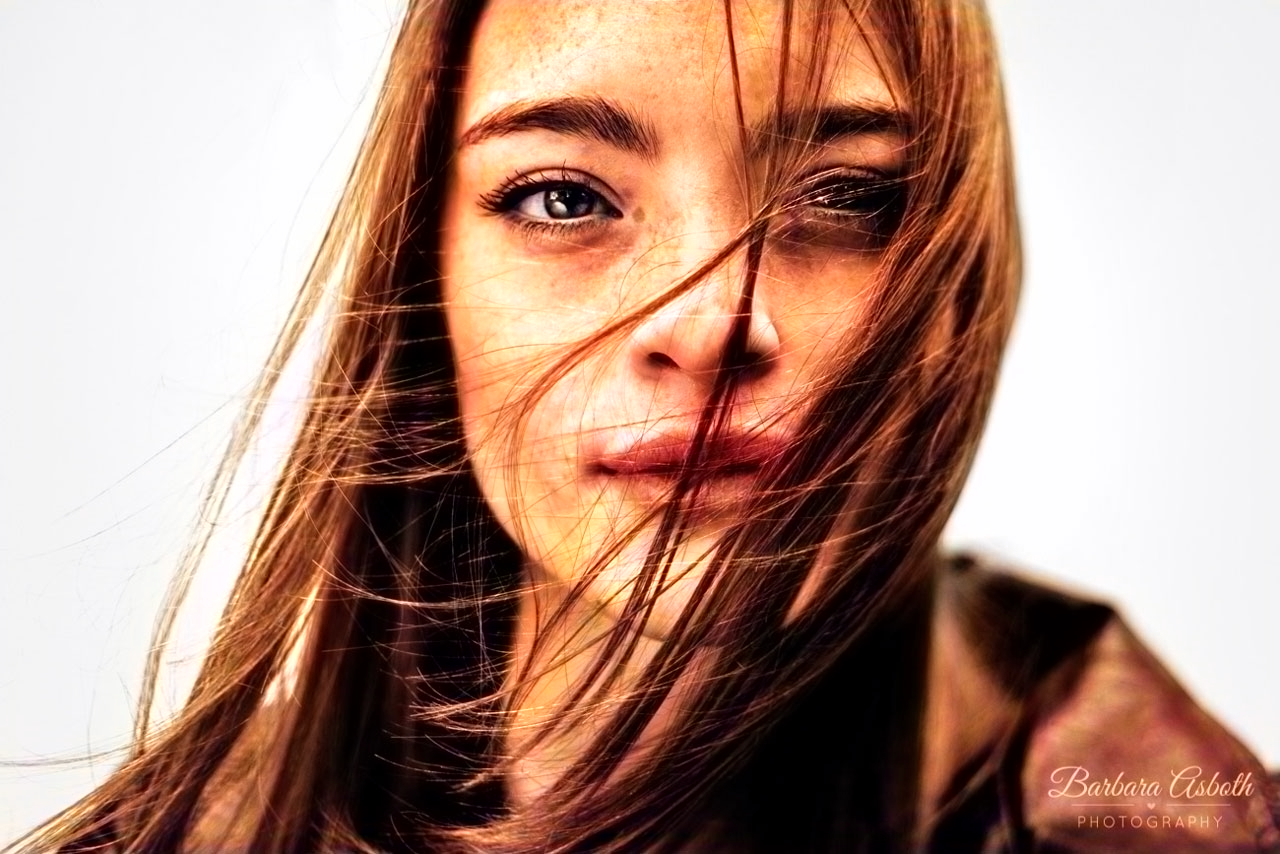

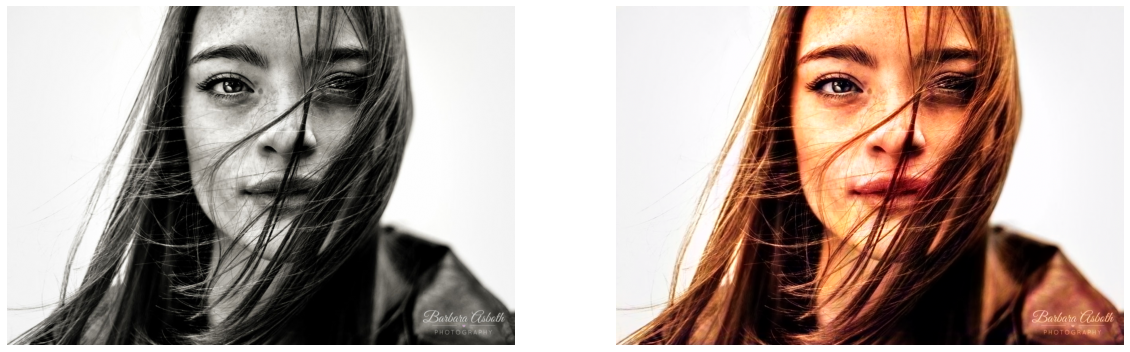

In [8]:
source_url = 'https://www.dzoom.org.es/wp-content/uploads/2010/08/16460653650_36f1de6b60_o.jpg' 
render_factor = 10 

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=False)
    #image_path = colorizer.plot_transformed_image(path=source_url, render_factor=render_factor, compare=True, watermarked=False)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

En caso de que queramos ver un rango completo de imagenes donde se varie el render factor ejecutamos el siguiente codigo.

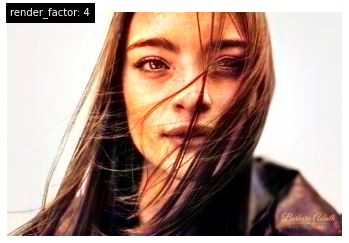

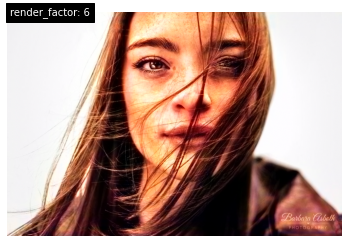

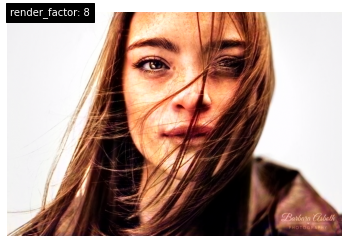

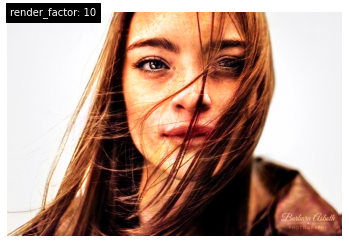

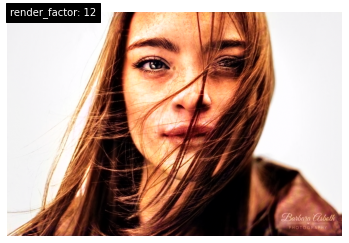

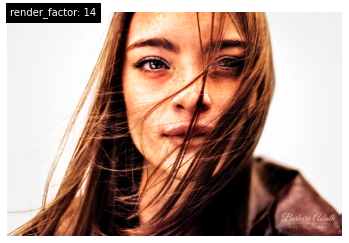

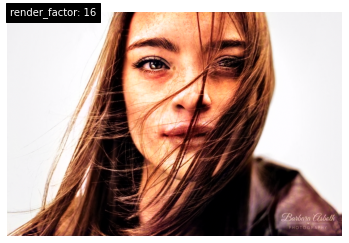

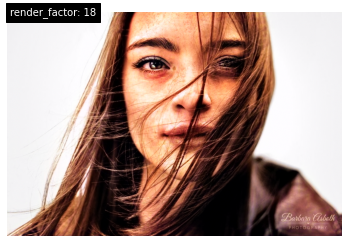

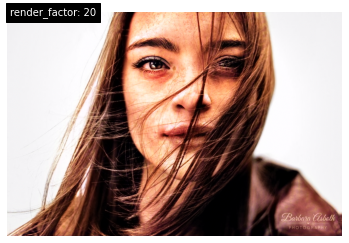

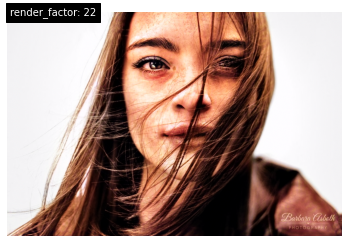

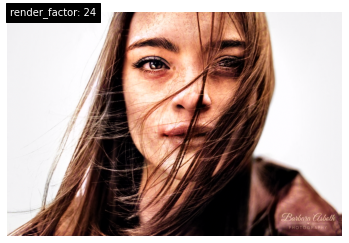

In [11]:
for i in range(4,25,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(6,6))